# Optymalizacja

In [1]:
# %matplotlib notebook
import numpy as np 
import matplotlib.pyplot as plt
import scipy


Celem tego ćwiczenia jest porównanie wydajność różnych metod optymalizacji dostępnych w Pythonie. 

**Zadanie 1.**

Do tego rodzaju testów często wykorzystuje się funkcję Rosenbrocka:
$$
f(\mathbf{x})=\sum_{i=1}^{N-1}\left[100\left(x_{i+1}-x_i^2\right)^2+\left(1-x_i\right)^2\right] \quad \text { gdzie } \quad \mathbf{x}=\left(x_1, \ldots, x_N\right) \in \mathbb{R}^N
$$

W przypadku dwóch zmienny funkcja sprowadza się do postaci:
$$f(x, y)=(1-x)^2+100\left(y-x^2\right)^2$$

Zaimplementuj trójwymiarową (dwie zmienne) funkcję Rosenbrocka i przedstaw ją na wykresie (na osiach x i y zastosuj wartości z przedziału $[-10,10]$). 

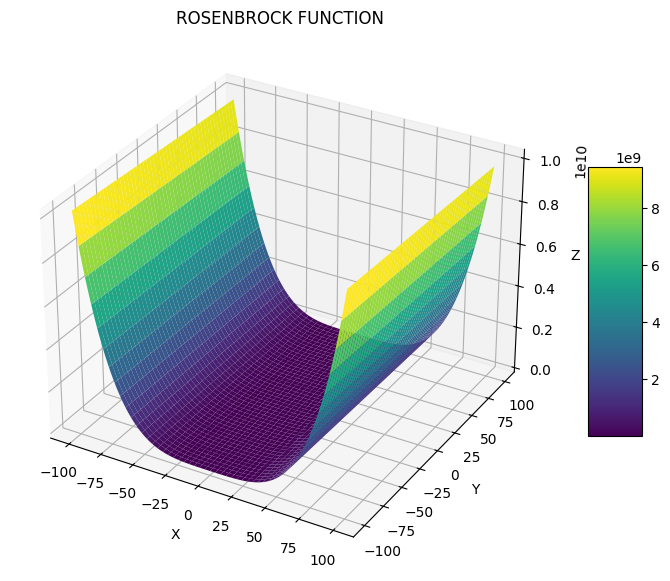

In [2]:
def rosenbrock(x, y):
    return (1-x)**2 + 100*(y - x**2)**2

x = np.linspace(-100, 100, 1000)
y = np.linspace(-100, 100, 1000)
X, Y = np.meshgrid(x, y)
Z = rosenbrock(X, Y)
    
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, Z, cmap='viridis')
ax.set_title('ROSENBROCK FUNCTION')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
fig.colorbar(surf, shrink=0.5, aspect=5)

**Zadanie 2.**

Inną popularną funkcją jest funkcja rastrigin
$$ f(\mathbf{x})=A n+\sum_{i=1}^n\left[x_i^2-A \cos \left(2 \pi x_i\right)\right]$$
gdzie $A=10$ oraz $x_i \in[-5.12,5.12]$

Zaimplementuj jej trójwymiarową (dwie zmienne) wersję i przedstaw ją na wykresie (na osiach x i y zastosuj wartości z przedziału $[-5.12,5.12]$). 

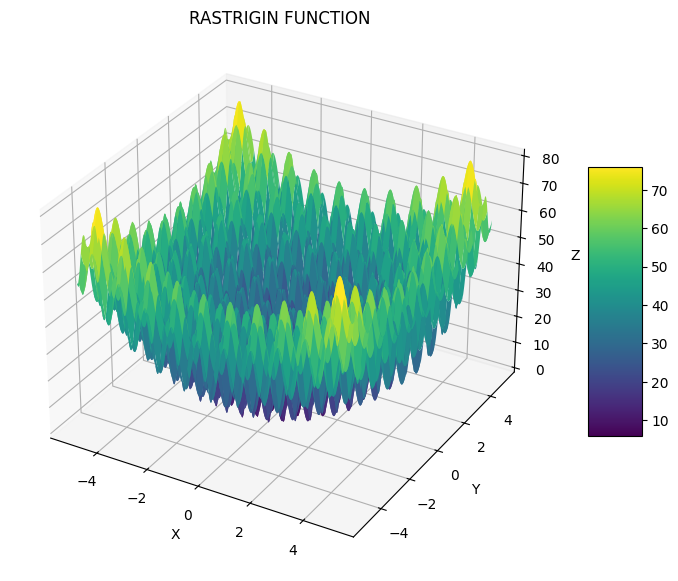

In [3]:
def rastrigin(x, y, A=10, n=2):
    return A * n + (x**2 - A * np.cos(2 * np.pi * x)) + (y**2 - A * np.cos(2 * np.pi * y))

x = np.linspace(-5.12, 5.12, 1000)
y = np.linspace(-5.12, 5.12, 1000)
# x = np.linspace(-0.5, 0.5, 1000)
# y = np.linspace(-0.5, 0.5, 1000)
X, Y = np.meshgrid(x, y)
Z = rastrigin(X, Y)

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, Z, cmap='viridis')
ax.set_title('RASTRIGIN FUNCTION')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
fig.colorbar(surf, shrink=0.5, aspect=5)

**Zadanie 3**

Gdzie znajdują się minima lokalne i globalne powyższych funkcji?

In [4]:
# Minima for the functions
# Rosenbrock (2D): global minimum at (x, y) = (1, 1), f = 0.
# Landscape: narrow curved valley; challenging for gradient methods.
# It has the global minimum only; many algorithms struggle due to ill-conditioning.

# Rastrigin (2D): global minimum at (x, y) = (0, 0), f = 0.
# Landscape: highly multimodal with many regularly spaced local minima.
# Optimization often requires global strategies or good initialization.

Rosenbrock global min at (1, 1), f=0
Rastrigin global min at (0, 0), f=0


**Zadanie 4.**

Zapoznaj się z dokumentacją modułu `optimize` z pakietu scipy i spróbuj znaleźć minima powyższych funkcji za pomocą kilku dostępnych w tym pakiecie metod (rozważ różne opcje funkcji `minimize` lub inne funkcje). Która z nich działa najszybciej (jeżeli jest taka możliwość, porównaj liczby iteracji lub czas działania)? Która daje dobre wyniki? Czy któraś z funkcji nie znajduje minimum? Zbadaj znaczenie parametrów.

In [5]:
import time
from scipy.optimize import minimize

# Define functions in optimization-friendly signature: f([x, y])
def rosenbrock_vec(xy):
    x, y = xy
    return (1 - x)**2 + 100 * (y - x**2)**2

def rastrigin_vec(xy, A=10):
    x, y = xy
    return A * 2 + (x**2 - A * np.cos(2 * np.pi * x)) + (y**2 - A * np.cos(2 * np.pi * y))

methods = ["Nelder-Mead", "Powell", "CG", "BFGS", "L-BFGS-B", "TNC", "SLSQP"]
start_points = [np.array([0.0, 0.0]), np.array([-1.2, 1.0]), np.array([2.0, 2.0]), np.array([-3.0, 3.0])]

results = []

for func_name, func in [("Rosenbrock", rosenbrock_vec), ("Rastrigin", rastrigin_vec)]:
    for x0 in start_points:
        for method in methods:
            t0 = time.perf_counter()
            try:
                res = minimize(func, x0, method=method)
                t1 = time.perf_counter()
                results.append({
                    "function": func_name,
                    "method": method,
                    "x0": x0.tolist(),
                    "x": res.x.tolist(),
                    "f": float(res.fun),
                    "nit": int(res.nit) if hasattr(res, "nit") and res.nit is not None else None,
                    "nfev": int(res.nfev) if hasattr(res, "nfev") and res.nfev is not None else None,
                    "success": bool(res.success),
                    "time_ms": (t1 - t0) * 1000.0,
                    "message": str(res.message),
                })
            except Exception as e:
                t1 = time.perf_counter()
                results.append({
                    "function": func_name,
                    "method": method,
                    "x0": x0.tolist(),
                    "x": None,
                    "f": None,
                    "nit": None,
                    "nfev": None,
                    "success": False,
                    "time_ms": (t1 - t0) * 1000.0,
                    "message": f"Exception: {e}",
                })

# Summarize best per function and a quick method ranking
import pandas as pd
results_df = pd.DataFrame(results)
print("Summary (first 10 rows):")
print(results_df.head(10))

print("\nBest results per function (min f):")
for func_name in ["Rosenbrock", "Rastrigin"]:
    sub = results_df[results_df["function"] == func_name]
    best = sub.loc[sub["f"].idxmin()]
    print(f"{func_name}: method={best['method']}, x0={best['x0']}, x={best['x']}, f={best['f']:.6g}, success={best['success']}, nit={best['nit']}, nfev={best['nfev']}, time_ms={best['time_ms']:.2f}")

print("\nFastest successful methods per function:")
for func_name in ["Rosenbrock", "Rastrigin"]:
    sub = results_df[(results_df["function"] == func_name) & (results_df["success"])]
    if len(sub) == 0:
        print(f"{func_name}: no successful runs")
        continue
    fastest = sub.loc[sub["time_ms"].idxmin()]
    print(f"{func_name}: method={fastest['method']}, x0={fastest['x0']}, f={fastest['f']:.6g}, time_ms={fastest['time_ms']:.2f}")

print("\nFailures or poor convergence (f >> 0):")
poor = results_df[(~results_df["success"]) | (results_df["f"].fillna(np.inf) > 1e-2)]
print(poor[["function", "method", "x0", "f", "success", "message"]].head(20))

Summary (first 10 rows):
     function       method           x0  \
0  Rosenbrock  Nelder-Mead   [0.0, 0.0]   
1  Rosenbrock       Powell   [0.0, 0.0]   
2  Rosenbrock           CG   [0.0, 0.0]   
3  Rosenbrock         BFGS   [0.0, 0.0]   
4  Rosenbrock     L-BFGS-B   [0.0, 0.0]   
5  Rosenbrock          TNC   [0.0, 0.0]   
6  Rosenbrock        SLSQP   [0.0, 0.0]   
7  Rosenbrock  Nelder-Mead  [-1.2, 1.0]   
8  Rosenbrock       Powell  [-1.2, 1.0]   
9  Rosenbrock           CG  [-1.2, 1.0]   

                                          x             f  nit  nfev  success  \
0  [1.0000043858986165, 1.0000106409916478]  3.686177e-10   79   146     True   
1  [1.0000000000000013, 1.0000000000000027]  1.774937e-30   16   414     True   
2  [0.9999955232400303, 0.9999910255233491]  2.008538e-11   21   165     True   
3   [0.9999946714834704, 0.999989321324053]  2.844005e-11   19    72     True   
4  [0.9999969793758166, 0.9999939467607158]  9.138571e-12   21    78     True   
5   [1.00003914